In [ ]:
# //JSMJ

# Lab Exp-7
22nd September 2021
### 19csu003

In [1]:
import numpy as np  #playing datafram
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:

iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Copy of iris dataset
iris_data= iris.drop(['Id'],axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


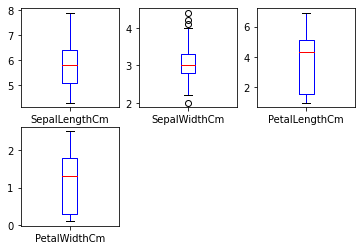

In [5]:
# From the boxplot, it is visible that only sepal width is having the
# outlier, whereas sepallength, petallength, petalwidth having
# datapoints within min and maxrange.
# It is visible that values in sepallength and sepalwidth are tightly
# distributed and IQ range is small, whereas in petallength and
# petalwidth the values are distibuted widely,so IQ range are high
boxplot=iris_data.plot(kind='box',colormap='bwr', subplots=True,
                      layout=(2,3) ,sharex=False, sharey=False)

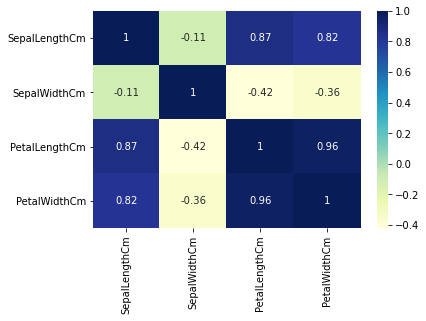

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt #Visualize
corr = iris_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu",annot=True)
plt.show()
# measure strength and direction of realtionship among variable

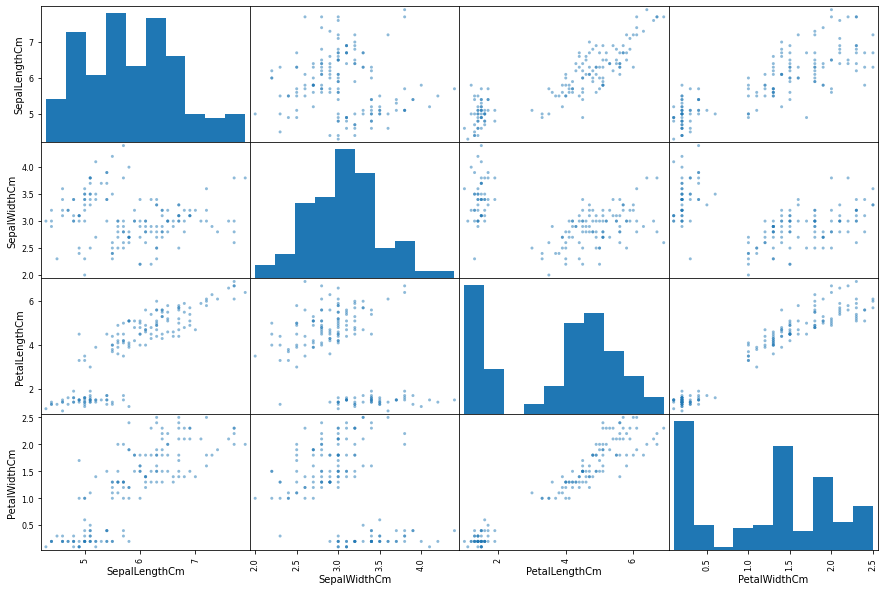

In [7]:
scatter=pd.plotting.scatter_matrix(iris_data,figsize=(15,10))

In [8]:
# From correlation matrix and scatterplot, it is clear that independent
# variable Petal.Length and Petal.width are positively and strongly 
# correlated to Sepal.Length. Whereas Sepal.Width is negatively and 
# weakly correlated to Sepal.Length. It also provide the insight of 
# multicollinearity between the variable Petal.Length and Petal.Width

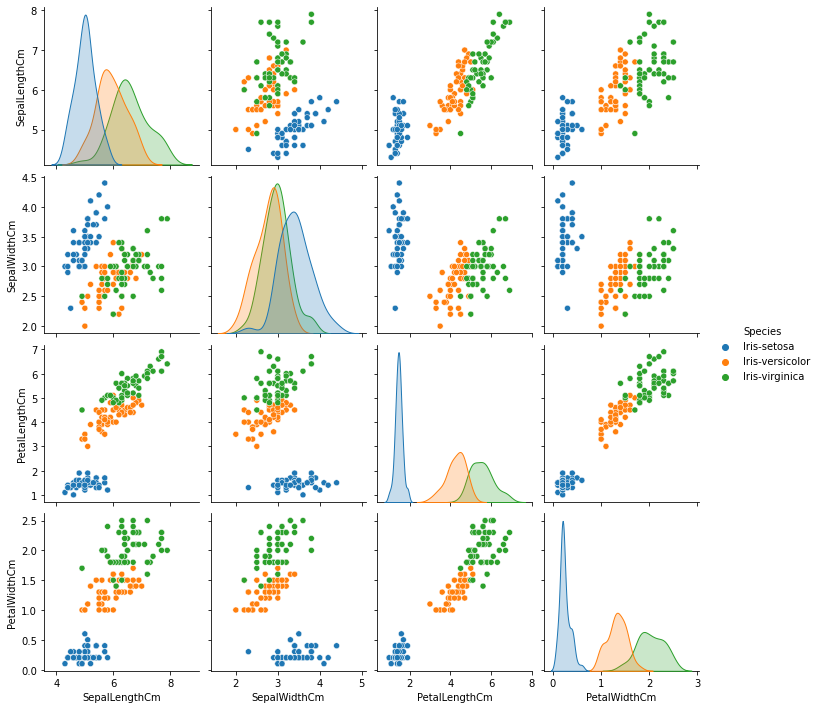

In [9]:
scatterplot=sns.pairplot(iris_data,hue="Species")


In [ ]:
# # Scatterplot with best fit line to explore relation b/w
# sepallength(dependent)& sepalwidth,petalwidth,
# petallengh(Independent)

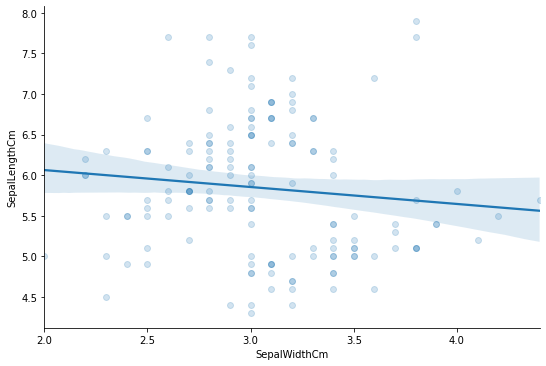

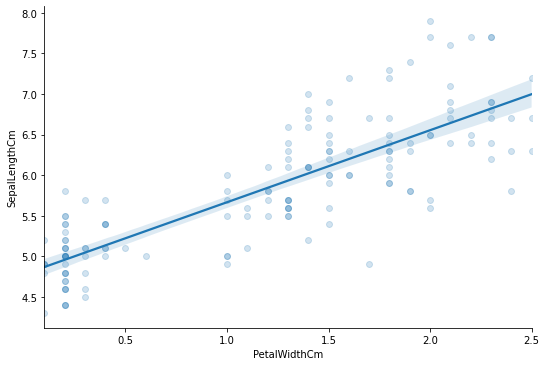

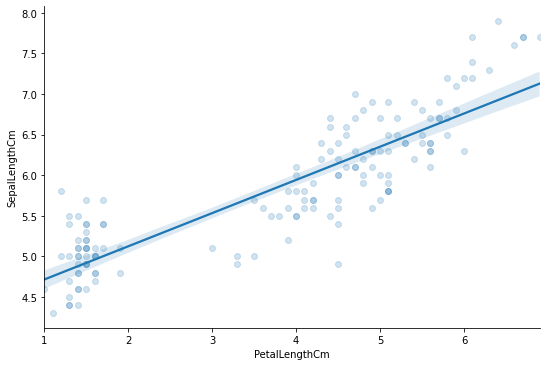

In [10]:
a=sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
b=sns.lmplot(x='PetalWidthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})
c=sns.lmplot(x='PetalLengthCm', y='SepalLengthCm', data=iris_data, aspect=1.5, scatter_kws={'alpha':0.2})

In [15]:
#Checking the relationship between Sepal width and Sepal length
from sklearn.linear_model import LinearRegression
i = ['SepalWidthCm']
j = ['SepalLengthCm']
X = iris_data[i]
Y = iris_data[j]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.coef_)  #-ve and weak [0.208]

# Holding constant fixed, a 1 centimeter increase
# in sepalwidth lead to a decrease in Sepalength by 0.208centimeter

[[-0.20887029]]


In [16]:
#Checking the relationship between Petal width and Sepal length
i = ['PetalLengthCm']
j = ['SepalLengthCm']
X = iris_data[i]
Y = iris_data[j]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.coef_)
# Holding constant fixed, a 1 centimeter increase
# in petalwidth lead to a increase in Sepalength by 0.887 centimeter


[[0.4091259]]


In [17]:
i = ['PetalWidthCm']
j = ['SepalLengthCm']
X = iris_data[i]
Y = iris_data[j]
#Creating the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X,Y)
print (linreg.coef_)

# Holding constant fixed, a 1 centimeter increase in petalwidth
# lead to a increase in Sepalength by 0.887 centimeter'

[[0.88751905]]


In [19]:
#Check for multicollinearity thrrough Determinant value

i = ['PetalWidthCm','PetalLengthCm', 'SepalWidthCm']
j = ['SepalLengthCm']
X = iris_data[i]
Y = iris_data[j]
corr = np.corrcoef(X, rowvar=0)
print(corr)
print('\n')
print (np.linalg.det(corr))

# petallength and petalwidth are highly correlated=96% and lead to multicollinearity.


# Run the input variable in different combination to find the determinant value.The deteminant of correlation matrix is 0<=D<=1.
# D=0, then it indicates exact interdependence of expalanatory variable. D=1, then expalanatory variable independent to each other and have no multicollinearity issue.


# 1.Determinant value for petalwidth, petallength, sepalwidth =0.057.
# 2.Determinant value for petallength, sepalwidth =0.816.
# 3.Determinant value for petalwidth, sepalwidth =0.865.
# 4.Determinant value for petalwidth, petallength =0.072.


# We will avoid the model 1 & 4, as the value of D is close to 0, which indicates the multicollinearity issue. Whereas model 2 & 3 are acceptable, as the value of D is close to 1 and independent variables are not dependent to eachother.
# In general, when threshold level is D>0.7, then we can take all the input variables in the model.If D<0.4, then we can say that there is lot of interdependency between variables and we need to drop those variables which are highly correlated and causing multicollinearity.

[[ 1.          0.9627571  -0.35654409]
 [ 0.9627571   1.         -0.4205161 ]
 [-0.35654409 -0.4205161   1.        ]]


0.05783850919062387


In [25]:
# best one is
i = ['PetalLengthCm', 'SepalWidthCm']
j = ['SepalLengthCm']
X = iris_data[i]
y = iris_data[j]
y=iris_data['SepalLengthCm']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=12)
# random state is eslection of random combination of set
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

In [27]:

print ('R-Squared for training dataset model:', model.score(X_train,y_train))

print('\n')
# The high R-Squared value (0.834) from petallength & sepalwidth, 
# implies that petallength & sepalwidth
# can be relied to explain 83.4% of the variations in sepallength.

R-Squared for training dataset model: 0.8342913726297885




In [29]:
import sklearn.metrics as metrics
## Predicting the x_test with the model
predicted=model.predict(X_test)

#  Input variable petallength and Sepal width
print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
## R Squared value or coefficient of determination
print(metrics.r2_score(y_test,predicted))

# lower value better accuracy

MAE: 0.24397281467906046
MSE: 0.09431993312135639
RMSE: 0.30711550452778574
0.8447727117366579
